In [103]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

train_data = 'spells/train/1'
test_data = 'spells/test/1'

def one_hot_label(img):
    label = img.split('.')[0]
    global ohl
    if label == "AM":
        ohl = 0
    elif label == "Incendio":
        ohl = 1
    elif label == "Revelio":
        ohl = 2
    elif label == "WLeviosa":
        ohl = 3
    return ohl

def train_data_with_label():
    train_images = []
    for i in tqdm(os.listdir(train_data)):
        path = os.path.join(train_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        train_images.append([np.array(img), one_hot_label(i)])
    shuffle(train_images)
    print("\nTraining images:", len(train_images))
    return train_images

def test_data_with_label():
    test_images = []
    for i in tqdm(os.listdir(test_data)):
        path = os.path.join(test_data, i)
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        test_images.append([np.array(img), one_hot_label(i)])
    print("Testing images: ", len(test_images))
    return test_images

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *

training_images = train_data_with_label()
testing_images = test_data_with_label()
x_train = np.array([i[0] for i in training_images]).reshape(-1,28,28,1)
y_train = np.array([i[1] for i in training_images])
x_test = np.array([i[0] for i in testing_images]).reshape(-1,28,28,1)
y_test = np.array([i[1] for i in testing_images])

100%|██████████████████████████████████████████████████████████████████████████████| 128/128 [00:00<00:00, 2566.83it/s]



Training images: 128


100%|████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 2674.19it/s]


Testing images:  32


In [104]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)

print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])


x_train shape: (128, 28, 28, 1)
Number of images in x_train 128
Number of images in x_test 32


In [105]:
print(y_train)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

    

[1 1 1 1 0 0 0 0 0 3 0 0 1 0 1 3 1 2 2 3 3 0 0 3 3 3 2 0 3 2 2 3 1 2 2 3 0
 0 3 3 0 2 3 3 0 3 1 3 2 1 2 3 1 2 1 0 0 2 1 2 1 1 0 0 1 2 2 0 1 0 1 3 3 0
 2 3 0 3 1 3 1 3 1 2 2 3 0 2 3 1 2 3 3 3 2 0 1 3 2 2 1 2 1 2 0 1 1 1 2 2 0
 0 2 3 1 0 0 0 3 2 2 2 2 3 0 1 1 1]


{0: 32, 1: 32, 2: 32, 3: 32}

[0.]
3


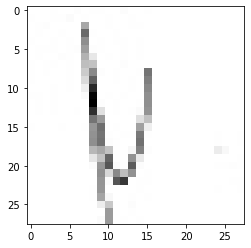

In [106]:
a = 31

x_test_temp = x_train[a,:,:,0]
x_test_temp.shape
#print(y_train[image_index])
plt.imshow(x_test_temp, cmap='Greys')
print (x_train[a,10,10,:])
print(y_train[a])

In [107]:
input_shape = (28, 28, 1)

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(4,activation=tf.nn.softmax))

In [108]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


In [109]:
model.fit(x=x_train,y=y_train, epochs=1)


Epoch 1/1
128/128 [==============================] - ETA: 3s - loss: 1.3837 - acc: 0.250 - ETA: 1s - loss: 1.3337 - acc: 0.531 - 1s 10ms/step - loss: 1.2517 - acc: 0.6719


In [110]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 0s 7ms/step


[1.0647634267807007, 0.875]

In [111]:
score = model.evaluate(x_test, y_test, verbose = 0)
accuracy = 100*score[1]
print("Test accuracy: %.4f%%" % accuracy)

Test accuracy: 87.5000%


In [112]:
y_test[18]

2

3


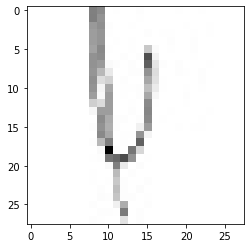

In [113]:
image_index = 26
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

ValueError: num must be 1 <= num <= 25, not 26

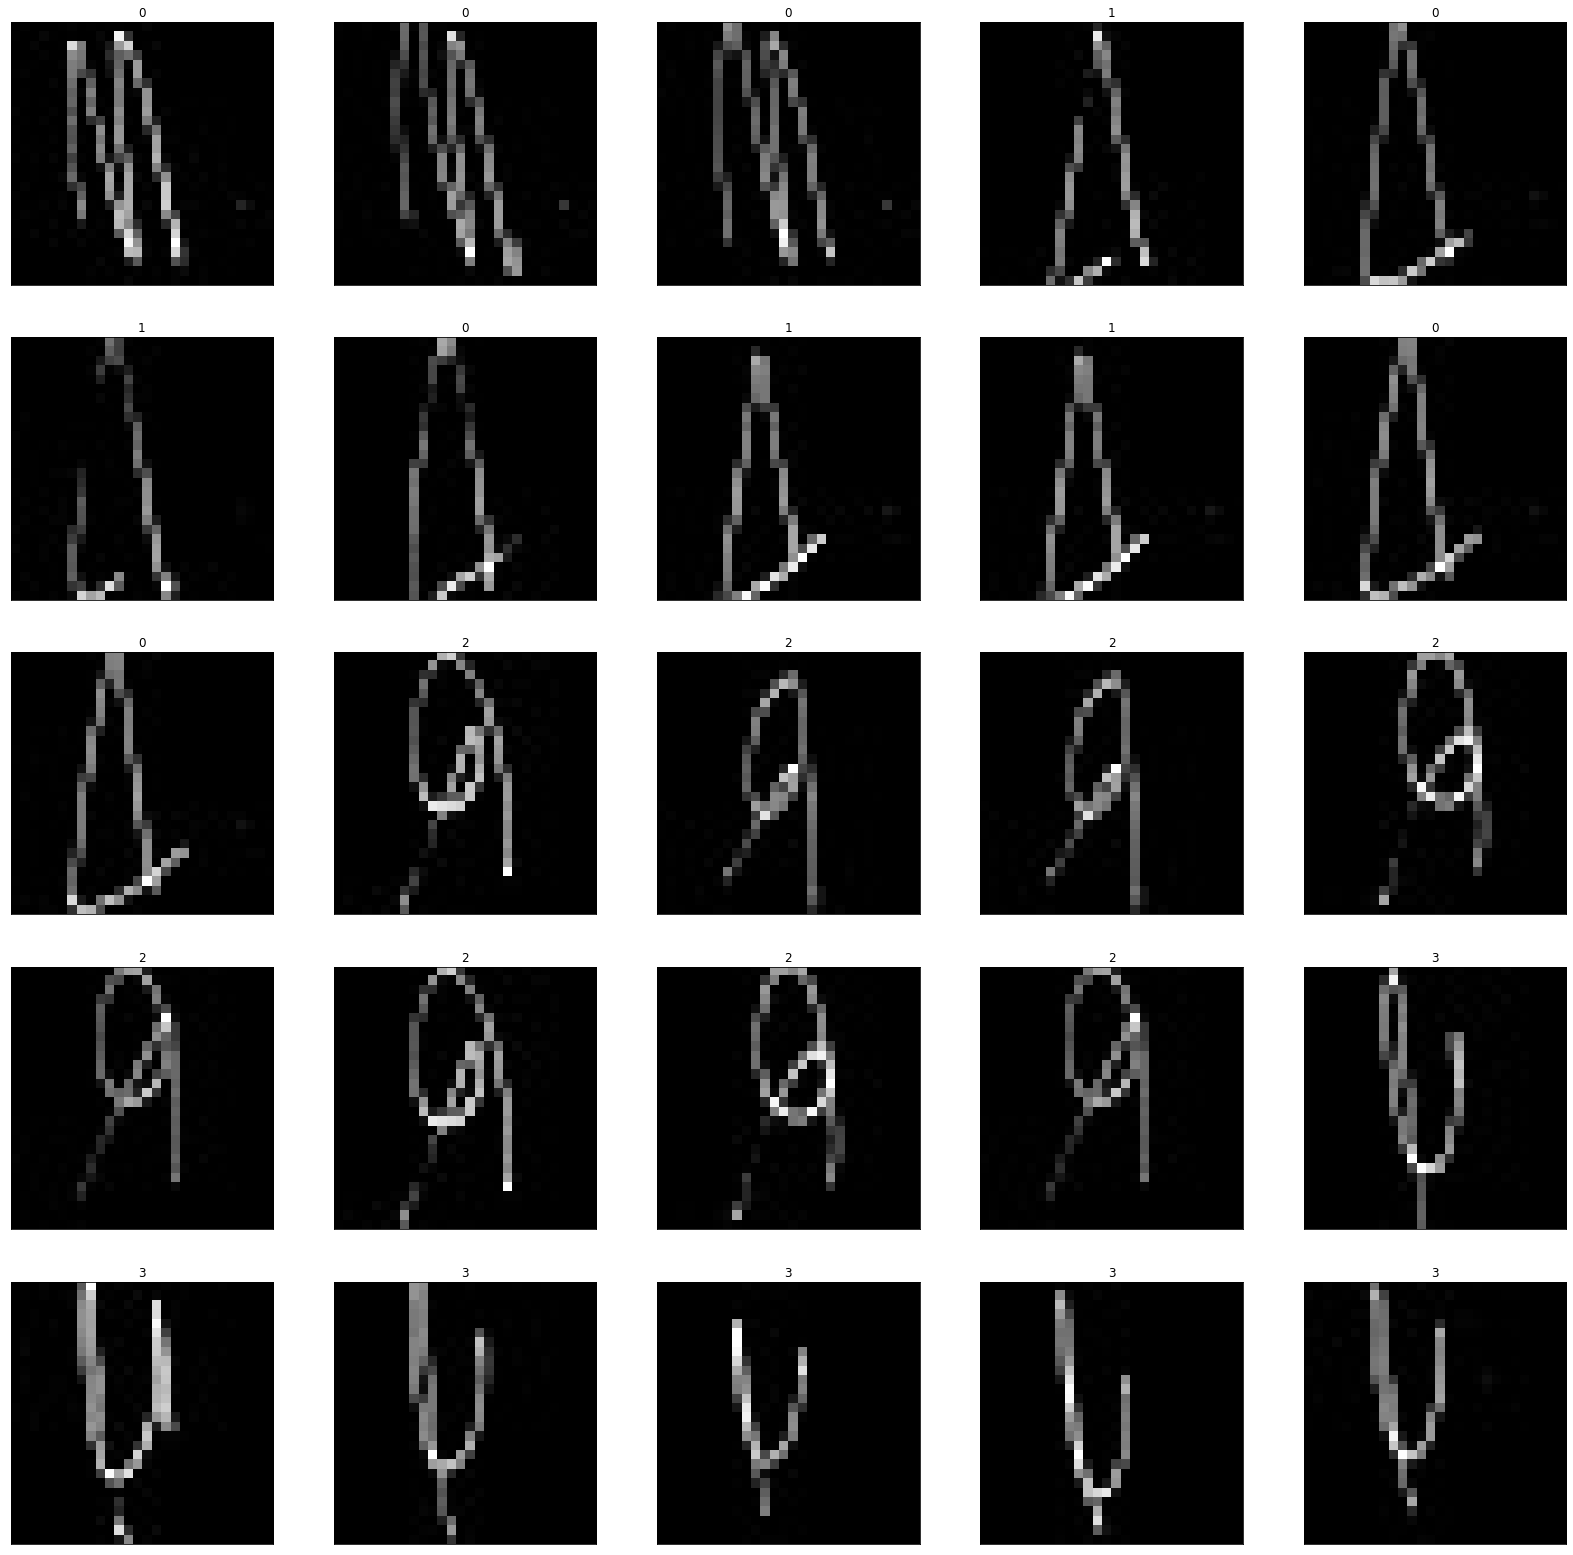

In [119]:
fig = plt.figure(figsize=(28,28))

for cnt, data in enumerate(testing_images[5:50]):
    y = fig.add_subplot(5,5, cnt+1)
    img = data[0]
    data = img.reshape(1,28,28,1)
    model_out = model.predict([data])
    #print(model_out)

    if np.argmax(model_out) == 0:
        str_label = '0'
    elif np.argmax(model_out) == 1:
        str_label = '1'
    elif np.argmax(model_out) == 2:
        str_label = '2'
    elif np.argmax(model_out) == 3:
        str_label = '3'

    y.imshow(img, cmap= 'gray')
    #name = str_label + str(cnt) + ".jpg"
    #cv2.imwrite(name,img)
    plt.title(str_label)
    #print(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [115]:
model_json = model.to_json()
with open("model_for_spells.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_for_spells.h5")
print("Saved model to disk")

Saved model to disk


Loaded model from disk
Detected spell:  Incendio  -  [1]


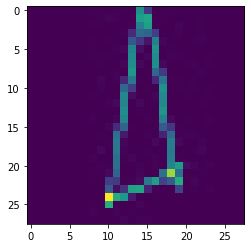

In [116]:
# Importing the Keras libraries and packages
from keras.models import model_from_json
from PIL import Image
import numpy as np

# load json and create model
json_file = open('model_for_spells.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_for_spells.h5")
print("Loaded model from disk")

img = Image.open('spells/validate_model/.jpg').convert("L")
plt.imshow(img)
img = np.resize(img, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
y_pred = loaded_model.predict_classes(im2arr)

global foundSpell 
if y_pred == 0:
    foundSpell = "Arresto Momentum"
elif y_pred == 1:
    foundSpell = "Incendio"
elif y_pred == 2:
    foundSpell = "Revelio"
elif y_pred == 3:
    foundSpell = "Wingardium Leviosa"


print("Detected spell: ", foundSpell, " - ", y_pred)

